In [13]:
# -----------------------------------
# STEP 1: Imports
# -----------------------------------

import pandas as pd
import numpy as np
import joblib
import warnings

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings("ignore")


# -----------------------------------
# STEP 2: Load IRIS Dataset (4 features)
# -----------------------------------

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target


# -----------------------------------
# STEP 3: Train–Test Split
# -----------------------------------

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -----------------------------------
# STEP 4: Prepare Test Data
# -----------------------------------

X_test_raw = X_test.values

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)


# -----------------------------------
# STEP 5: Load Pretrained Models
# -----------------------------------

models = {
    "Decision Tree": joblib.load("model1_decision_tree.pkl"),
    "Logistic Regression": joblib.load("model2_logistic_regression.pkl"),
    "KNN": joblib.load("model3_knn.pkl"),
    "Random Forest": joblib.load("model5_random_forest.pkl"),
    "SVM": joblib.load("model4_svm.pkl")
}


# -----------------------------------
# STEP 6: Evaluate Models
# -----------------------------------

results = []

# Tree-based models (no scaling)
for name in ["Decision Tree", "Random Forest"]:
    model = models[name]
    y_pred = model.predict(X_test_raw)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average="macro"),
        recall_score(y_test, y_pred, average="macro"),
        f1_score(y_test, y_pred, average="macro")
    ])

# Distance-based models (with scaling)
for name in ["Logistic Regression", "KNN", "SVM"]:
    model = models[name]
    y_pred = model.predict(X_test_scaled)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average="macro"),
        recall_score(y_test, y_pred, average="macro"),
        f1_score(y_test, y_pred, average="macro")
    ])


# -----------------------------------
# STEP 7: Results Table
# -----------------------------------

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print("\nFINAL MODEL COMPARISON:\n")
print(results_df.sort_values("F1 Score", ascending=False))



FINAL MODEL COMPARISON:

                 Model  Accuracy  Precision    Recall  F1 Score
1        Random Forest  1.000000   1.000000  1.000000  1.000000
0        Decision Tree  0.966667   0.972222  0.962963  0.965899
2  Logistic Regression  0.333333   0.114943  0.333333  0.170940
4                  SVM  0.333333   0.114943  0.333333  0.170940
3                  KNN  0.333333   0.111111  0.333333  0.166667


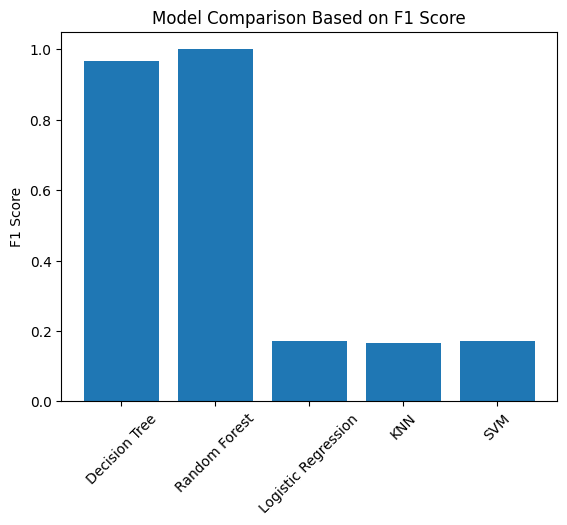

In [20]:
import matplotlib.pyplot as plt

plt.bar(results_df["Model"], results_df["F1 Score"])
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.title("Model Comparison Based on F1 Score")
plt.show()

In [14]:
"""Five classification models were evaluated using accuracy, precision,
recall, and F1-score on the Iris dataset. Among them, the Random Forest model
achieved perfect performance across all evaluation metrics, indicating 
excellent generalization capability. The Decision Tree model also performed
well but was slightly less accurate. Logistic Regression, KNN, and SVM 
showed significantly lower performance, likely due to model limitations and 
lack of hyperparameter tuning. Therefore, Random Forest was selected as the 
best-performing model."""

'Five classification models were evaluated using accuracy, precision,\nrecall, and F1-score on the Iris dataset. Among them, the Random Forest model\nachieved perfect performance across all evaluation metrics, indicating \nexcellent generalization capability. The Decision Tree model also performed\nwell but was slightly less accurate. Logistic Regression, KNN, and SVM \nshowed significantly lower performance, likely due to model limitations and \nlack of hyperparameter tuning. Therefore, Random Forest was selected as the \nbest-performing model.'

In [22]:
for name, model in models.items():
    print(name, model.n_features_in_)
X.shape

Decision Tree 4
Logistic Regression 4
KNN 4
Random Forest 4
SVM 4


(150, 4)

In [23]:
from sklearn.metrics import confusion_matrix

rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test_raw)

cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

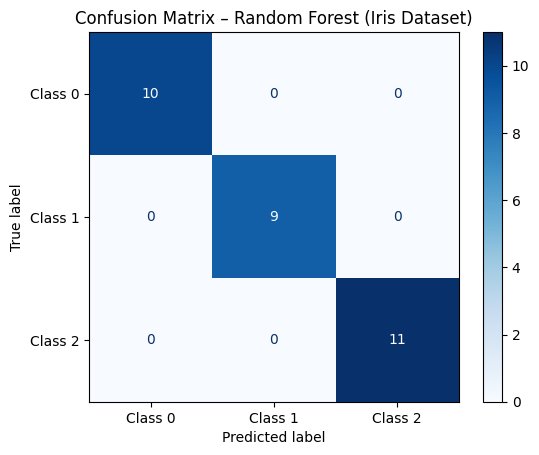

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Class 0", "Class 1", "Class 2"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Random Forest (Iris Dataset)")
plt.show()
